In [1]:
import nibabel as nib
import os
from matplotlib import pyplot as plt
import numpy as np
import random
import json

rootdir = '/sailhome/yuhuiz/develop/data/MedicalImages/msd'

In [15]:
rootdir = '/sailhome/yuhuiz/develop/data/MedicalImages/msd/processed'

dirs = sorted([d for d in os.listdir(rootdir) if d.startswith('Task') and not d.endswith('.tar') and '_' in d])

plt.figure(figsize=(20, 50))

random.seed(1234)
for i, dir in enumerate(dirs):
    # if i == 2: break
    print(dir)
    
    filenames = sorted([f for f in os.listdir(f'{rootdir}/{dir}/annotations/training') if f.endswith('.nii.gz') and not f.startswith('.')])
    filename2slice = {}
    for filename in filenames:
        fileid, sliceid = filename.replace('.nii.gz', '').split('_')[1:]
    n_slices = [for filename in filenames]
    print(filenames)
    input()

    

Task01_BrainTumour
['BRATS_001_000.nii.gz', 'BRATS_001_001.nii.gz', 'BRATS_001_002.nii.gz', 'BRATS_001_003.nii.gz', 'BRATS_001_004.nii.gz', 'BRATS_001_005.nii.gz', 'BRATS_001_006.nii.gz', 'BRATS_001_007.nii.gz', 'BRATS_001_008.nii.gz', 'BRATS_001_009.nii.gz', 'BRATS_001_010.nii.gz', 'BRATS_001_011.nii.gz', 'BRATS_001_012.nii.gz', 'BRATS_001_013.nii.gz', 'BRATS_001_014.nii.gz', 'BRATS_001_015.nii.gz', 'BRATS_001_016.nii.gz', 'BRATS_001_017.nii.gz', 'BRATS_001_018.nii.gz', 'BRATS_001_019.nii.gz', 'BRATS_001_020.nii.gz', 'BRATS_001_021.nii.gz', 'BRATS_001_022.nii.gz', 'BRATS_001_023.nii.gz', 'BRATS_001_024.nii.gz', 'BRATS_001_025.nii.gz', 'BRATS_001_026.nii.gz', 'BRATS_001_027.nii.gz', 'BRATS_001_028.nii.gz', 'BRATS_001_029.nii.gz', 'BRATS_001_030.nii.gz', 'BRATS_001_031.nii.gz', 'BRATS_001_032.nii.gz', 'BRATS_001_033.nii.gz', 'BRATS_001_034.nii.gz', 'BRATS_001_035.nii.gz', 'BRATS_001_036.nii.gz', 'BRATS_001_037.nii.gz', 'BRATS_001_038.nii.gz', 'BRATS_001_039.nii.gz', 'BRATS_001_040.nii.g

FileNotFoundError: [Errno 2] No such file or directory: '/sailhome/yuhuiz/develop/data/MedicalImages/msd/processed/Task01_BrainTumour/dataset.json'

<Figure size 1440x3600 with 0 Axes>

In [14]:
dirs = sorted([d for d in os.listdir(rootdir) if d.startswith('Task') and not d.endswith('.tar') and '_' in d])

plt.figure(figsize=(20, 50))

random.seed(1234)
for i, dir in enumerate(dirs):
    # if i == 2: break
    print(dir)
    
    filenames = sorted([f for f in os.listdir(f'{rootdir}/{dir}/imagesTr') if f.endswith('.nii.gz') and not f.startswith('.')])
    sampled_filenames = random.sample(filenames, 2)
    all_data = []
    for filename in sampled_filenames:
        data = nib.load(f'{rootdir}/{dir}/imagesTr/{filename}').get_fdata()
        label = nib.load(f'{rootdir}/{dir}/labelsTr/{filename}').get_fdata()
        if len(data.shape) == 4:
            label = np.stack([label] * data.shape[-1], axis=-1)
        # print(data.shape, label.shape)
        foreground_data = data[label != 0]
        all_data.append(foreground_data.reshape(-1))
    all_data = np.concatenate(all_data, axis=0)

    metadata = json.load(open(f'{rootdir}/{dir}/dataset.json'))

    ## all_filenames = metadata["training"]
    ## train_filenames = all_filenames[: int(0.8 * len(all_filenames))]
    ## val_filenames = all_filenames[int(0.8 * len(all_filenames)) : int(0.95 * len(all_filenames))]
    ## test_filenames = all_filenames[int(0.95 * len(all_filenames)) :]
    ## print(len(train_filenames), len(val_filenames), len(test_filenames))
    name, description, modality, labels = metadata['name'], metadata['description'], metadata['modality'], metadata['labels']

    text = f'Name: {name}\nDescription: {description}\nModality: {modality}\nLabels: {labels}\n\nMean: {np.mean(all_data):.2f}\nStd: {np.std(all_data):.2f}\nMin: {np.min(all_data):.2f}\nMax: {np.max(all_data):.2f}\n\n0.5% Quantile: {np.quantile(all_data, 0.005):.2f}\n99.5% Quantile: {np.quantile(all_data, 0.995):.2f}'
    print(text)
    print('\n\n\n')

    plt.subplot(5, 2, i + 1)
    plt.hist(all_data, bins=100)
    plt.title(dir)
    plt.text(0.5, 0.5, text, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

Task01_BrainTumour
387 72 25
Task02_Heart
16 3 1
Task03_Liver
104 20 7
Task04_Hippocampus
208 39 13
Task05_Prostate
25 5 2
Task06_Lung
50 9 4
Task07_Pancreas
224 42 15
Task08_HepaticVessel
242 45 16
Task09_Spleen
32 6 3
Task10_Colon
100 19 7


<Figure size 1440x3600 with 0 Axes>

Task01_BrainTumour


/tmp/ipykernel_2143777/571658096.py:12: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data = nib.load(f'{dir}/imagesTr/{sampled_filename}').get_data()
/tmp/ipykernel_2143777/571658096.py:13: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  label = nib.load(f'{dir}/labelsTr/{sampled_filename}').get_data()


(240, 240, 155, 4) (240, 240, 155)
Task02_Heart
(320, 320, 110) (320, 320, 110)
Task03_Liver
(512, 512, 407) (512, 512, 407)
Task04_Hippocampus
(35, 52, 34) (35, 52, 34)
Task05_Prostate
(320, 320, 20, 2) (320, 320, 20)
Task06_Lung
(512, 512, 267) (512, 512, 267)
Task07_Pancreas
(512, 512, 71) (512, 512, 71)
Task08_HepaticVessel
(512, 512, 40) (512, 512, 40)
Task09_Spleen
(512, 512, 164) (512, 512, 164)
Task10_Colon
(512, 512, 80) (512, 512, 80)


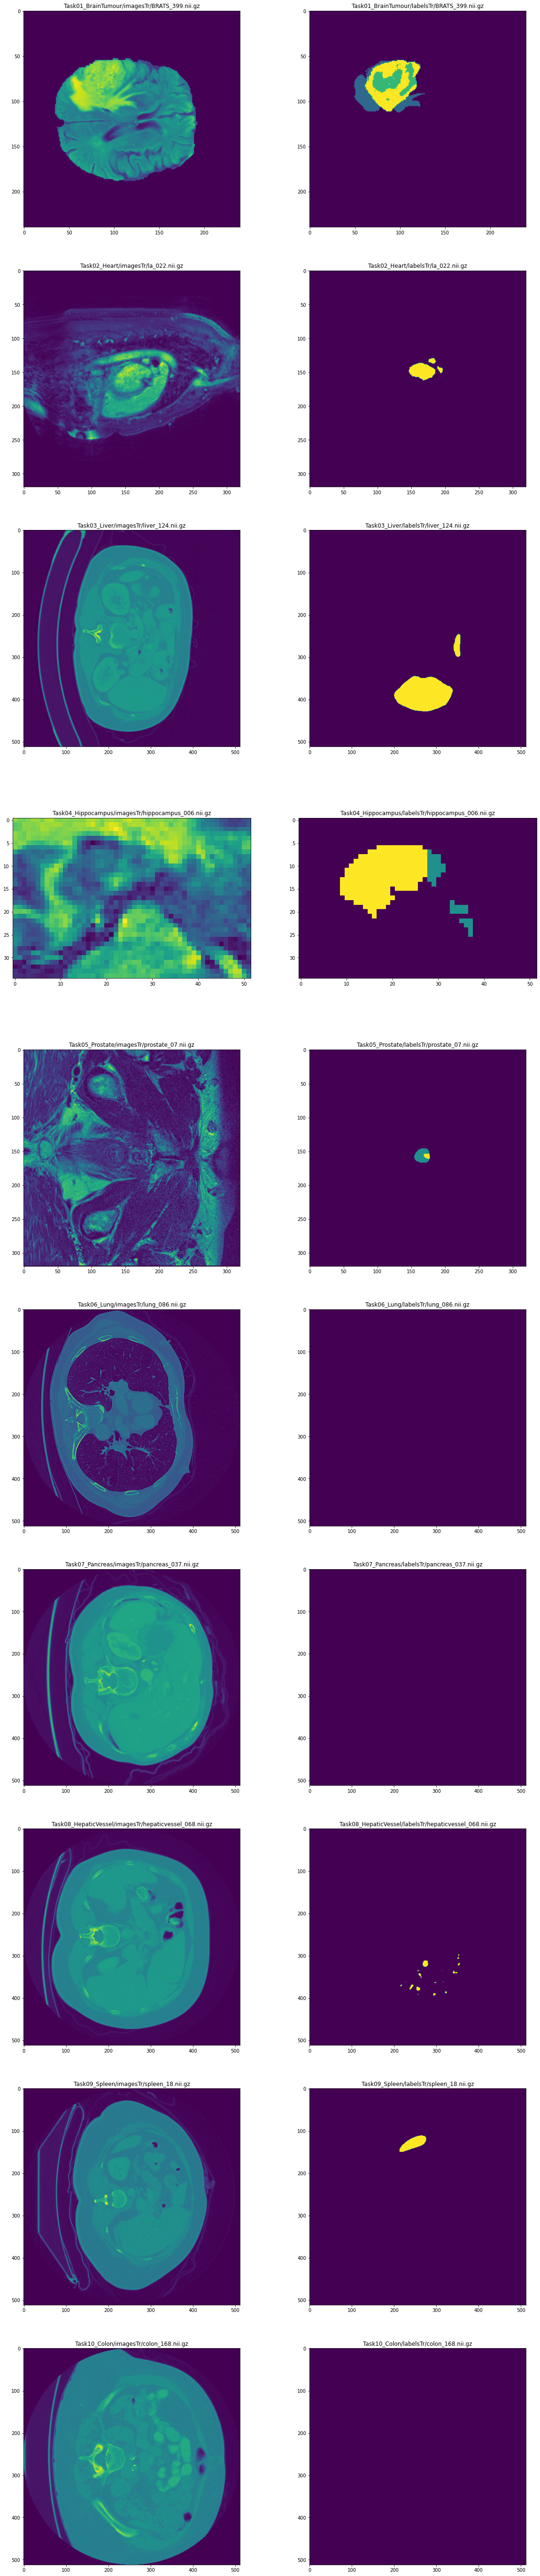

In [4]:
dirs = sorted([d for d in os.listdir('.') if d.startswith('Task') and not d.endswith('.tar') and '_' in d])

plt.figure(figsize=(20, 100))

random.seed(1234)
for i, dir in enumerate(dirs):
    # if i == 4: break
    print(dir)

    filenames = sorted([f for f in os.listdir(f'{dir}/imagesTr') if f.endswith('.nii.gz') and not f.startswith('.')])
    sampled_filename = random.sample(filenames, 1)[0]
    data = nib.load(f'{dir}/imagesTr/{sampled_filename}').get_data()
    label = nib.load(f'{dir}/labelsTr/{sampled_filename}').get_data()

    print(data.shape, label.shape)
    if len(data.shape) == 4: data = data[..., 0]
    
    plt.subplot(10, 2, 2 * i + 1)
    plt.imshow(data[..., data.shape[2] // 2])
    plt.title(f'{dir}/imagesTr/{sampled_filename}')
    
    plt.subplot(10, 2, 2 * i + 2)
    plt.imshow(label[..., data.shape[2] // 2])
    plt.title(f'{dir}/labelsTr/{sampled_filename}')


In [6]:
heart = nib.load('Task02_Heart/imagesTr/la_003.nii.gz').get_data()
heart_label = nib.load('Task02_Heart/labelsTr/la_003.nii.gz').get_data()
print(np.mean(heart), np.std(heart), np.min(heart), np.max(heart))
print(heart.shape, heart_label.shape)

/tmp/ipykernel_1478576/3541773262.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  heart = nib.load('Task02_Heart/imagesTr/la_003.nii.gz').get_data()


172.74055 263.33517 0.0 1999.0
(320, 320, 130) (320, 320, 130)


/tmp/ipykernel_1478576/3541773262.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  heart_label = nib.load('Task02_Heart/labelsTr/la_003.nii.gz').get_data()


/tmp/ipykernel_3495866/2136606126.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  lung = nib.load('Task10_Colon/imagesTr/colon_042.nii.gz').get_data()
/tmp/ipykernel_3495866/2136606126.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  lung_label = nib.load('Task10_Colon/labelsTr/colon_042.nii.gz').get_data()


(512, 512, 55) (512, 512, 55)


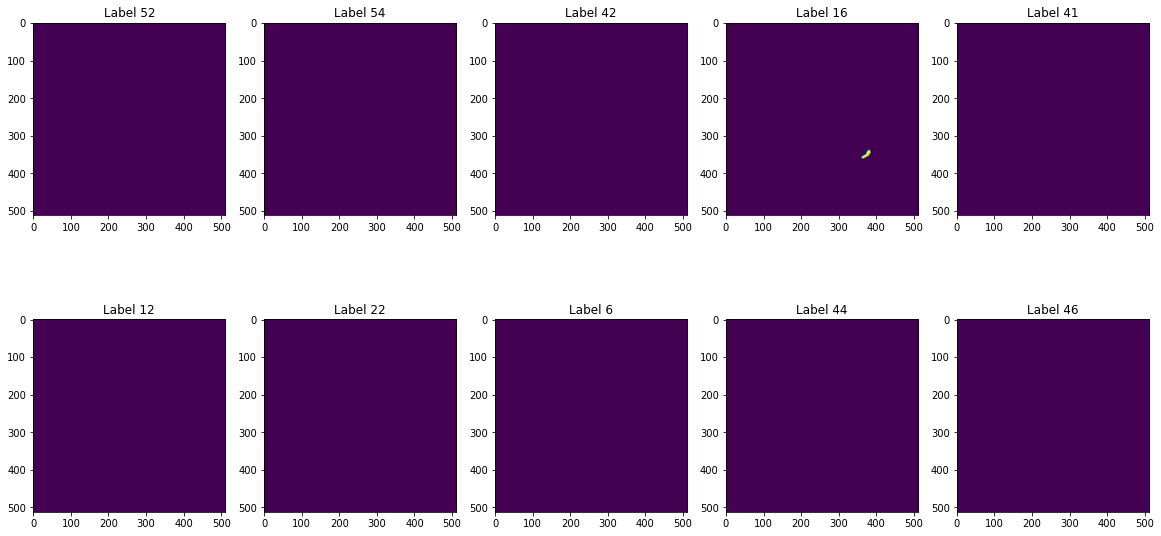

In [19]:
# use nibabel to open Task06_Lung/labelsTr/lung_095.nii.gz
lung = nib.load('Task10_Colon/imagesTr/colon_042.nii.gz').get_data()
lung_label = nib.load('Task10_Colon/labelsTr/colon_042.nii.gz').get_data()
print(lung.shape, lung_label.shape)

idxs = list(range(lung_label.shape[-1]))
sampled_idxs = random.sample(idxs, 10)

# visualize 10 label slices
plt.figure(figsize=(20, 10))
for i, idx in enumerate(sampled_idxs):
    plt.subplot(2, 5, i + 1)
    plt.imshow(lung_label[..., idx])
    plt.title(f'Label {idx}')